# Comprehensive Analysis of Wealth Disparities: A 30-Year Study Using the SCF

*By Romina Goodarzi*

In this task, I analyzed trends in median total wealth, focusing on race and education over the last 30 years using data from the Survey of Consumer Finances (1989-2016). I examined both housing and non-housing wealth, particularly for black and white households, and identified the largest losses in housing wealth, with a specific focus on the 2007 base period. 

## Step 1: import Libraries and the data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('SCF.csv')

## Step 2: exploratory data analysis

In [3]:
df.shape

(46962, 11)

In [4]:
df.head(21)

,weight,year,age,sex,education,race,asset_total,asset_housing,debt_total,debt_housing,income
0,6859.959728,1989,35,female,no college,white,3731.72,0.00,1530.01,0.00,9737.17
1,7375.788638,1989,35,female,no college,black,0.00,0.00,0.00,0.00,11684.60
2,4193.294199,1989,40,male,no college,other,216439.77,139939.51,26681.80,18658.60,83739.63
3,4743.208024,1989,51,female,no college,black,40060.02,18658.60,26383.26,5597.58,19474.33
4,5971.319496,1989,28,male,no college,black,35675.24,33585.48,27987.90,20524.46,35053.80
5,5767.627432,1989,32,male,no college,other,10262.23,9329.30,0.00,0.00,11684.60
6,5767.627432,1989,33,male,no college,other,32111.45,27987.90,11195.16,7463.44,21421.77
7,8168.769554,1989,52,male,no college,black,62413.02,55975.80,3358.55,0.00,29211.50
8,8734.388591,1989,62,male,no college,black,82097.84,74634.40,4590.02,0.00,19474.33
9,9068.672450,1989,63,female,no college,white,1865.86,0.00,5597.58,0.00,5842.30


In [5]:
df.columns

Index(['weight', 'year', 'age', 'sex', 'education', 'race', 'asset_total',
       'asset_housing', 'debt_total', 'debt_housing', 'income'],
      dtype='object')

In [6]:
df.dtypes

weight           float64
year               int64
age                int64
sex               object
education         object
race              object
asset_total      float64
asset_housing    float64
debt_total       float64
debt_housing     float64
income           float64
dtype: object

In [7]:
df.describe()

,weight,year,age,asset_total,asset_housing,debt_total,debt_housing,income
count,46962.000000,46962.000000,46962.000000,4.696100e+04,4.696100e+04,4.696100e+04,4.696100e+04,4.696100e+04
mean,4578.245232,2003.991951,50.924641,9.539526e+06,5.807992e+05,2.604816e+05,1.163603e+05,7.546582e+05
std,3097.740481,8.453145,16.223475,5.149212e+07,1.983688e+06,2.562495e+06,4.460637e+05,5.281057e+06
min,0.200000,1989.000000,17.000000,-2.248731e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2236.842378,1998.000000,39.000000,5.218421e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.242859e+04
50%,4722.055420,2004.000000,50.000000,3.115639e+05,1.487704e+05,2.564363e+04,0.000000e+00,7.026047e+04
75%,6525.055987,2010.000000,63.000000,1.568793e+06,4.342556e+05,1.577000e+05,1.119693e+05,1.740980e+05
max,31115.820076,2016.000000,95.000000,2.928346e+09,1.826421e+08,2.934870e+08,4.482108e+07,3.519589e+08


In [8]:
df.isna().sum()

weight           0
year             0
age              0
sex              0
education        0
race             1
asset_total      1
asset_housing    1
debt_total       1
debt_housing     1
income           1
dtype: int64

In [9]:
df = df.dropna()

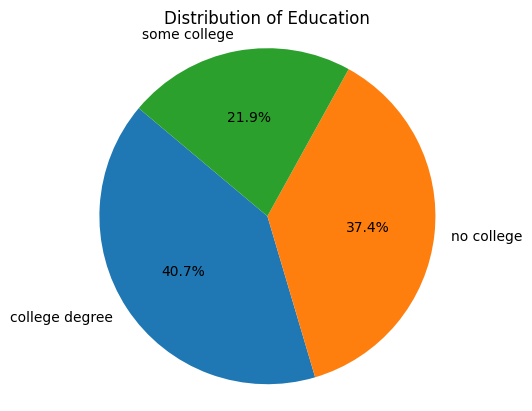

In [10]:
education_counts = df.value_counts('education')

plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education')
plt.axis('equal') 
plt.show()

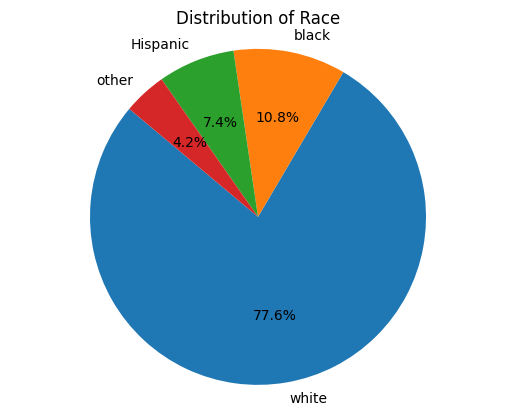

In [11]:
race_counts = df['race'].value_counts()

plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Race')
plt.axis('equal')  
plt.show()

## Step 3

- 3.1 - Median total wealth by race
- 3.2 - Median total wealth by education

### 3.1.1 - Calculate total wealth 

In [12]:
df['total_wealth'] = df['asset_total'] - df['debt_total']

### 3.1.2 - Define a function to compute the weighted median

In [13]:
def weighted_median(data, weights):
    sorted_data = data.sort_values()
    cumulative_weight = weights.loc[sorted_data.index].cumsum()
    cutoff = weights.sum() / 2
    return sorted_data[cumulative_weight >= cutoff].iloc[0]

### 3.1.3 - Calculate the median total wealth by race and year

In [14]:
def median_wealth_by_race(df, race):
    median_wealth = df[df['race'] == race].groupby('year').apply(
        lambda x: weighted_median(x['total_wealth'], x['weight'])
    )
    return median_wealth

### 3.1.4 - Define racial groups

In [15]:
racial_groups = df['race'].unique()

### 3.1.5 - Create an empty dictionary to store trends for each racial group

In [16]:
trends_race = {}

### 3.1.6 - Loop through each racial group and compute median total wealth by year

In [17]:
for race in racial_groups:
    trends_race[race] = median_wealth_by_race(df, race)

### 3.1.7 - Create a DataFrame to store the results

In [18]:
trends_df_race = pd.DataFrame(trends_race)
trends_df_race

,white,black,other,Hispanic
year,,,,
1989,134901.68,7836.62,62636.92,7463.44
1992,113285.98,17827.24,61380.71,10900.94
1995,120582.34,18228.29,48232.94,18933.00
1998,143562.03,23754.87,69420.28,14415.22
2001,169776.38,27503.47,88742.75,16258.21
2004,170100.84,26236.86,174488.49,19509.14
2007,188177.44,19802.06,180650.34,25499.49
2010,136508.10,17209.96,76488.75,16581.04
2013,139817.79,10785.35,95232.83,14095.20


### 3.1.8 - Plot the trends in median total wealth by race

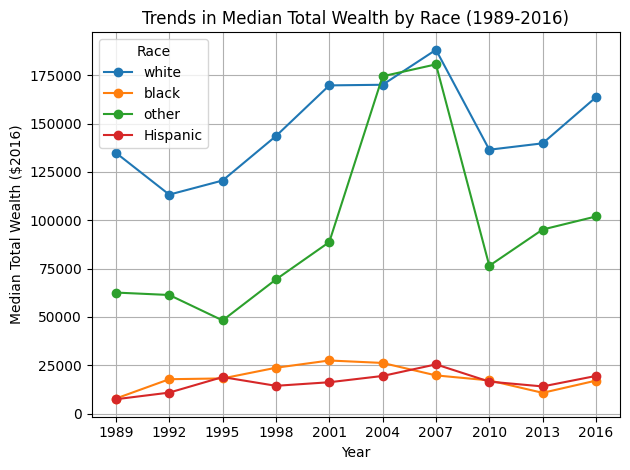

In [19]:
for race in trends_df_race.columns:
    plt.plot(trends_df_race.index, trends_df_race[race]  , label=race, marker='o')

plt.title('Trends in Median Total Wealth by Race (1989-2016)')
plt.xlabel('Year')
plt.ylabel('Median Total Wealth ($2016)')
plt.xticks(df['year'].unique())
plt.legend(title='Race')
plt.grid(True)
plt.tight_layout()

plt.show()

### 3.2.1 - Calculate the median total wealth by education level and year

In [20]:
def median_wealth_by_education(df, education_level):
    median_wealth = df[df['education'] == education_level].groupby('year').apply(
        lambda x: weighted_median(x['total_wealth'], x['weight'])
    )
    return median_wealth

### 3.2.2 - Define education levels

In [21]:
education_levels = df['education'].unique()

### 3.2.3 - Create an empty dictionary to store trends for each education level

In [22]:
trends_edu = {}

### 3.2.4 - Loop through each education level and compute median total wealth by year

In [23]:
for education in education_levels:
    trends_edu[education] = median_wealth_by_education(df, education)

### 3.2.5 - Create a DataFrame to store the results

In [24]:
trends_df_edu = pd.DataFrame(trends_edu)
trends_df_edu

,no college,college degree,some college
year,,,
1989,57655.07,233419.10,87061.03
1992,50109.13,183052.03,95173.64
1995,67651.39,191459.70,75794.61
1998,61231.49,261155.99,113831.55
2001,63772.83,347722.52,116246.22
2004,63334.75,331426.39,97036.96
2007,69110.34,375822.20,109953.53
2010,45810.35,276332.19,64274.87
2013,42027.82,291493.28,51967.68


### 3.2.6 - Plot the trends in median total wealth by education level

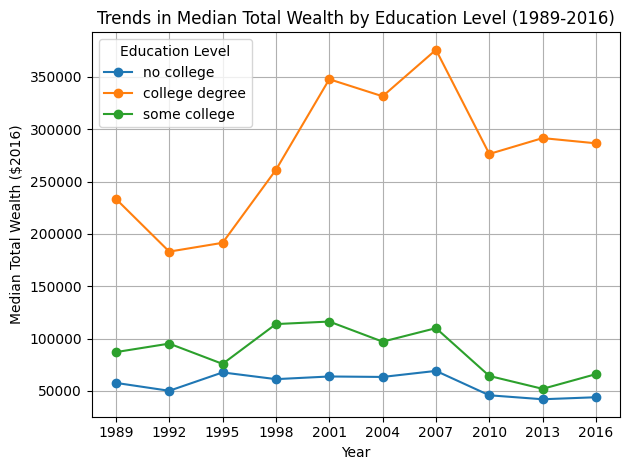

In [25]:
for education in trends_df_edu.columns:
    plt.plot(trends_df_edu.index, trends_df_edu[education], label=education, marker='o')

plt.title('Trends in Median Total Wealth by Education Level (1989-2016)')
plt.xlabel('Year')
plt.ylabel('Median Total Wealth ($2016)')
plt.xticks(df['year'].unique())
plt.legend(title='Education Level')
plt.grid(True)
plt.tight_layout()

plt.show()

## Step 4:

### 4.1 - Calculate housing wealth

In [26]:
df['housing_wealth'] = df['asset_housing'] - df['debt_housing']
df = df[df['housing_wealth'] != 0.0]

### 4.2 - Calculate the median housing wealth for black and white households by year

In [27]:
def median_housing_wealth_by_race(df, race):
    median_wealth = df[df['race'] == race].groupby('year').apply(
        lambda x: weighted_median(x['housing_wealth'], x['weight'])
    )
    return median_wealth

### 4.3 - Get the trends for black and white households

In [28]:
median_wealth_black = median_housing_wealth_by_race(df, 'black')
median_wealth_white = median_housing_wealth_by_race(df, 'white')

### 4.4 - Create a DataFrame to store the results

In [29]:
trends_households = pd.DataFrame({
    'Black Households': median_wealth_black,
    'White Households': median_wealth_white
})
trends_households

,Black Households,White Households
year,,
1989,55975.80,95158.87
1992,55343.26,83853.43
1995,46980.13,84564.24
1998,45739.18,88527.46
2001,50129.49,107033.23
2004,57230.19,117003.94
2007,69480.90,132013.71
2010,56371.77,93952.94
2013,51555.23,92799.42


### 4.5 - Plot the trends in median housing wealth for black and white households

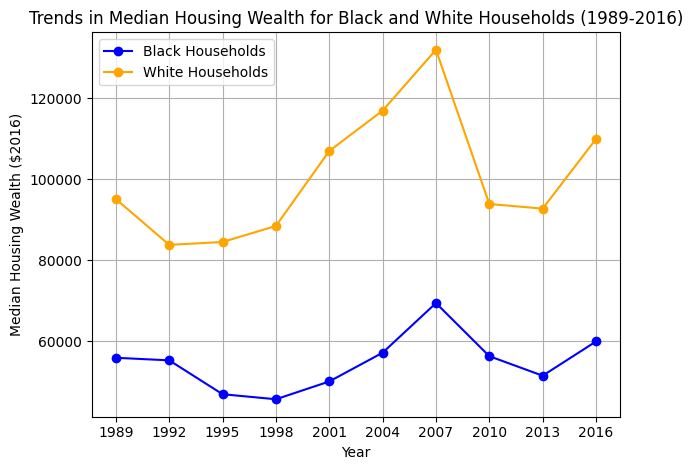

In [30]:
plt.plot(trends_households.index, trends_households['Black Households'], label='Black Households', color='blue', marker='o')
plt.plot(trends_households.index, trends_households['White Households'], label='White Households', color='orange', marker='o')
plt.xticks(df['year'].unique())
plt.title('Trends in Median Housing Wealth for Black and White Households (1989-2016)')
plt.xlabel('Year')
plt.ylabel('Median Housing Wealth ($2016)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

## Step 5:

- 5.1 - Median housing wealth for black and white households
- 5.2 - Median non-housing wealth for black and white households

### 5.1.1 - Create a homeowner column: If housing assets or housing debt > 0, they are homeowners.

In [31]:
df.loc[:, 'homeowner'] = (df['asset_housing'] > 0) | (df['debt_housing'] > 0)

### 5.1.2 - Subsetting to homeowners aged 25 or older

In [32]:
homeowners = df[(df['homeowner'] == True) & (df['age'] >= 25)]

### 5.1.3 - Get the trends for black and white households

In [33]:
median_black = median_housing_wealth_by_race(homeowners, 'black')
median_white = median_housing_wealth_by_race(homeowners, 'white')

### 5.1.4 - Create a DataFrame to store the results

In [34]:
trend_households_25 = pd.DataFrame({
    'Black Households': median_black,
    'White Households': median_white
})
trend_households_25

,Black Households,White Households
year,,
1989,57841.66,97024.72
1992,55343.26,87207.57
1995,46980.13,86130.24
1998,45739.18,90002.91
2001,51484.34,108388.08
2004,57230.19,118275.73
2007,69480.90,133171.73
2010,56371.77,97268.93
2013,51555.23,93830.52


### 5.1.5 - Plot the trends in Median Housing Wealth for Homeowners Age 25+ by Race

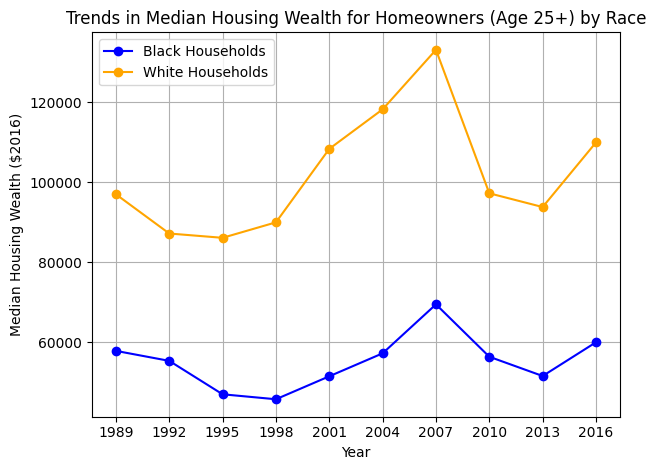

In [35]:
plt.plot(trend_households_25.index, trend_households_25['Black Households'], label='Black Households', color='blue', marker='o')
plt.plot(trend_households_25.index, trend_households_25['White Households'], label='White Households', color='orange', marker='o')
plt.xticks(df['year'].unique())
plt.title('Trends in Median Housing Wealth for Homeowners (Age 25+) by Race')
plt.xlabel('Year')
plt.ylabel('Median Housing Wealth ($2016)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### 5.2.1 - Calculate non-housing wealth for homeowners

In [36]:
homeowners = homeowners.copy()
homeowners.loc[:, 'non_housing_wealth'] = (
    homeowners['asset_total'] - homeowners['asset_housing'] - homeowners['debt_total'] + homeowners['debt_housing']
)

### 5.2.2 - Calculate weighted median of non-housing wealth by race and year

In [37]:
def median_non_housing_wealth_by_race(df, race):
    median_wealth = df[df['race'] == race].groupby('year').apply(
        lambda x: weighted_median(x['non_housing_wealth'], x['weight'])
    )
    return median_wealth

### 5.2.3 - Get the trends for black and white households

In [38]:
median_black_wealth = median_non_housing_wealth_by_race(homeowners, 'black')
median_white_wealth = median_non_housing_wealth_by_race(homeowners, 'white')

### 5.2.4 - Create a DataFrame to store the results

In [39]:
trends_housing_race = pd.DataFrame({
    'Black Households': median_black_wealth,
    'White Households': median_white_wealth
})
trends_housing_race

,Black Households,White Households
year,,
1989,12128.09,81780.65
1992,16602.98,70185.32
1995,20827.86,82105.61
1998,27561.55,114495.51
2001,32557.07,147814.26
2004,20984.41,123680.80
2007,40298.91,127173.21
2010,24593.56,112760.11
2013,18869.21,125836.00


### 5.2.5 - Plot the trends in Median Non-Housing Wealth for Homeowners Age 25+ by Race

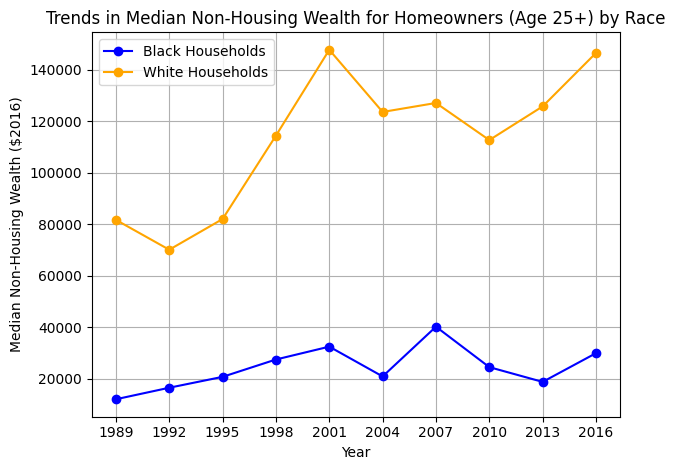

In [40]:
plt.plot(trends_housing_race.index, trends_housing_race['Black Households'], label='Black Households', color='blue', marker='o')
plt.plot(trends_housing_race.index, trends_housing_race['White Households'], label='White Households', color='orange', marker='o')
plt.xticks(df['year'].unique())
plt.title('Trends in Median Non-Housing Wealth for Homeowners (Age 25+) by Race')
plt.xlabel('Year')
plt.ylabel('Median Non-Housing Wealth ($2016)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


### 6.1 - Data for White and Black households

In [41]:
data = {
    'year': [2007, 2010, 2013, 2016],
    'Black Households': [69480.90, 56371.77, 51555.23, 60000.00],
    'White Households': [133171.73, 97268.93, 93830.52, 114000.00]
}

### 6.2 - Convert data into a DataFrame

In [42]:
trend_households = pd.DataFrame(data)

### 6.3 - Calculate losses for Black/White households

In [43]:
loss_black = {}
for end_year in [2010, 2013, 2016]:
    start_value = trend_households.loc[trend_households['year'] == 2007, 'Black Households'].values[0]
    end_value = trend_households.loc[trend_households['year'] == end_year, 'Black Households'].values[0]
    
    dollar_loss = end_value - start_value  # Corrected to show loss as a negative value if end_value is less
    proportional_loss = (dollar_loss / start_value) * 100  # Proportional loss in percentage
    
    loss_black[end_year] = (dollar_loss, proportional_loss)

loss_white = {}
for end_year in [2010, 2013, 2016]:
    start_value = trend_households.loc[trend_households['year'] == 2007, 'White Households'].values[0]
    end_value = trend_households.loc[trend_households['year'] == end_year, 'White Households'].values[0]
    
    dollar_loss = end_value - start_value  # Corrected to show loss as a negative value if end_value is less
    proportional_loss = (dollar_loss / start_value) * 100  # Proportional loss in percentage
    
    loss_white[end_year] = (dollar_loss, proportional_loss)

### 6.4 - Results

In [44]:
for year in [2010, 2013, 2016]:
    black_loss_dollar, black_loss_proportional = loss_black[year]
    white_loss_dollar, white_loss_proportional = loss_white[year]
    
    print(f"From 2007 to {year}:")
    print(f"  Black Households: Loss in Dollar Terms: ${black_loss_dollar:.2f}, Proportional Loss: {black_loss_proportional:.2f}%")
    print(f"  White Households: Loss in Dollar Terms: ${white_loss_dollar:.2f}, Proportional Loss: {white_loss_proportional:.2f}%")
    print()

From 2007 to 2010:
  Black Households: Loss in Dollar Terms: $-13109.13, Proportional Loss: -18.87%
  White Households: Loss in Dollar Terms: $-35902.80, Proportional Loss: -26.96%

From 2007 to 2013:
  Black Households: Loss in Dollar Terms: $-17925.67, Proportional Loss: -25.80%
  White Households: Loss in Dollar Terms: $-39341.21, Proportional Loss: -29.54%

From 2007 to 2016:
  Black Households: Loss in Dollar Terms: $-9480.90, Proportional Loss: -13.65%
  White Households: Loss in Dollar Terms: $-19171.73, Proportional Loss: -14.40%



## Thank you!

Thank you for reading through this notebook; I hope you found it informative.